            Word  Count
0            the    516
1      different      3
2            and    149
3           most     22
4     remarkable      1
...          ...    ...
1501   delicious      1
1502      claims      1
1503    catching      1
1504        seal      1
1505     islands      1

[1506 rows x 2 columns]


           Word  Count
3         whale     57
104        boat     26
291        ship     25
328        fish     24
48        water     22
...         ...    ...
187   animation      1
672       shook      1
184    almighty      1
182     reflect      1
1242    islands      1

[1243 rows x 2 columns]




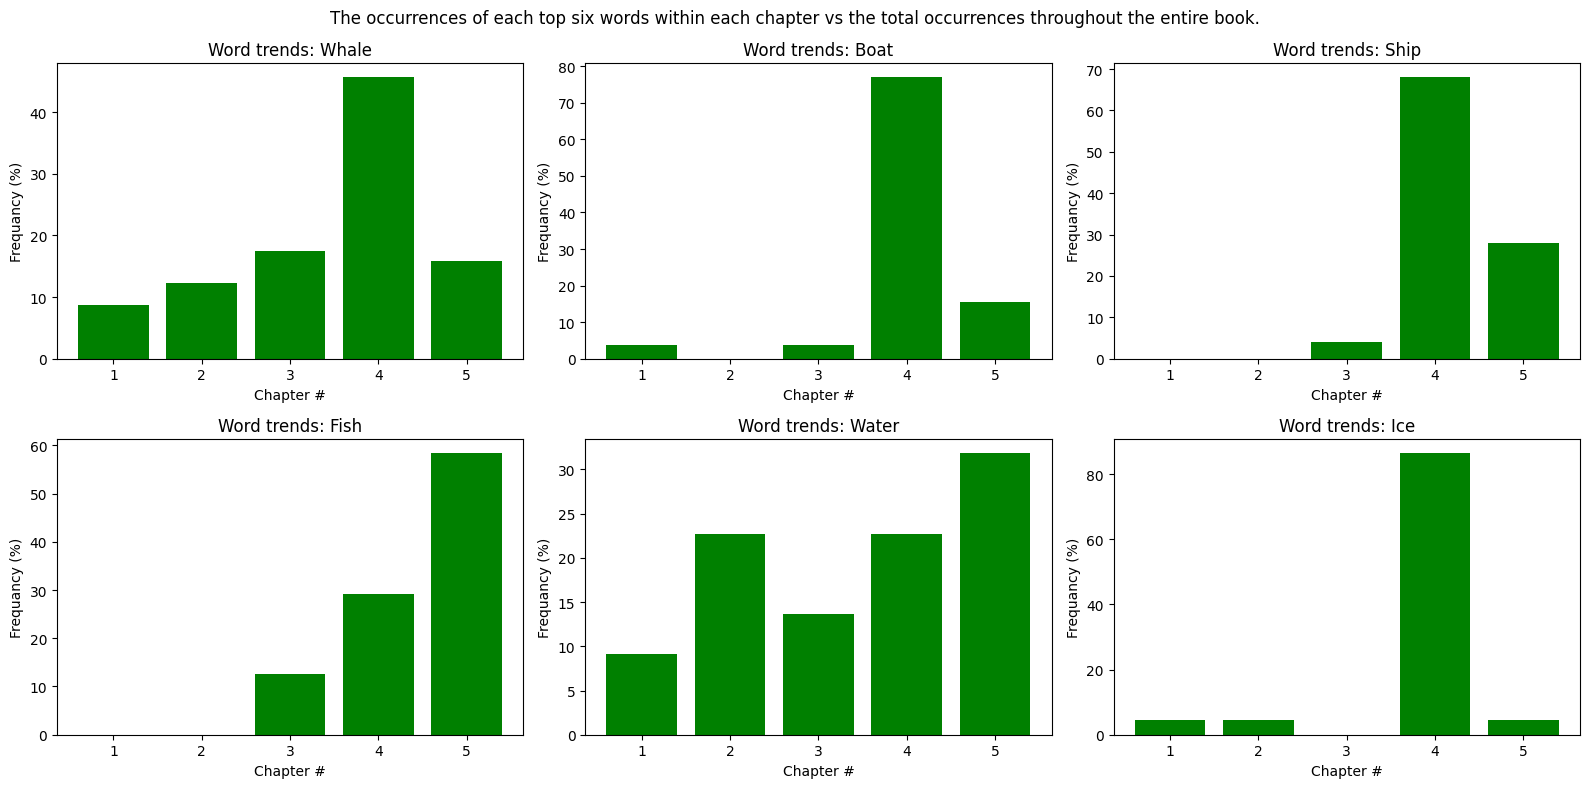

In [2]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt 
 
Words_count ={}
Words_Freq = []
stop_words=[]
words_list = []
chapters_numbers= ("CHAPTER1","CHAPTER2","CHAPTER3","CHAPTER4","CHAPTER5")
words = []
occurance_per_Chapter = []
All_chapter_occurace = []
To_six_words_dict = []
Top_six_words = []

def Get_Text_with_chapter(filename):
    with open(filename, 'r') as file:
        myList = file.read().split()
        Words_ch_number=[word.lower() for word in myList]
    return Words_ch_number

# Part B;
def load_book_words(filename):
    with open(filename, 'r') as file:
        list = file.read().split()
        words = [word.lower() for word in list if word not in chapters_numbers]

    # print(words)
    return words

def Get_Words_Freq(list):
    return Counter(list)

def remove_stop_words(filename, word_list):
    with open(filename, 'r') as file:
        stop_words = file.read().split(",")
        stop_words = [word.strip()[1:-1] for word in stop_words]  # Remove square brackets and extra spaces
        cleaned_list = [word for word in word_list if word not in stop_words]
    return cleaned_list

def find_sublist(list, word1, word2):
    if(word1=='chapter5'):
        L_chapt_index = list.index(word1)
        return list[L_chapt_index:]
    index1 = list.index(word1)
    index2 = list.index(word2)
    
    if index1 < index2:
        return list[index1+1:index2]
    else:
        return list[index2+1:index1]      

def get_occurance_by_chapter():
        chapters =['chapter1','chapter2','chapter3','chapter4','chapter5']
        Length = len(Top_six_words)
        for word in range(Length): 
            word = Top_six_words[word]
            chapterA = chapters[0]
            chapterB = chapters[1]
            chapterC = chapters[2]
            chapterD = chapters[3]
            chapterE = chapters[4]

            result_1 = find_sublist(Remove_stops, chapterA, chapterB)
            ChapterI = result_1.count(word)
            All_chapter_occurace.append(ChapterI)
        
            result_2 = find_sublist(Remove_stops, chapterB, chapterC)
            Chapter_II = result_2.count(word)
            All_chapter_occurace.append(Chapter_II)
        
            result_3 = find_sublist(Remove_stops, chapterC, chapterD)
            Chapter_III = result_3.count(word)
            All_chapter_occurace.append(Chapter_III)
        
            result_4 = find_sublist(Remove_stops, chapterD, chapterE)
            Chapter_IV = result_4.count(word)
            All_chapter_occurace.append(Chapter_IV)

            result_5 = find_sublist(Remove_stops, chapterE, Remove_stops[-1]) # special Case
            Chapter_V = result_5.count(word)
            All_chapter_occurace.append(Chapter_V)

def Calculate_ratio(My_List):
    ratios = []  # list to store ratios 
    for sublist in My_List:
        sublist_sum = sum(sublist)  # Calculate the sum of the sublist [[1,3],[1,2],[0,0]], sum = sum([1,3])
        for item in sublist:
            ratio = (item / sublist_sum) * 100  # Calculate the ratio
            ratios.append(ratio)
    Words_occurance_per_ch =  np.array_split(ratios, len(ratios) / 5)
    # print(ratios)

    return [list(SubList) for SubList in Words_occurance_per_ch]
 
# A


# I chose to use The Project Gutenberg eBook of Catching of the whale and seal
#  https://www.gutenberg.org/cache/epub/72862/pg72862.txt


# ================================================================================
# part B
# Load all words in WordText.txt into a list. 
words_list = load_book_words("WordText.txt")
# get the frequacy of each words in the words_list.
Words_Freq = Get_Words_Freq(words_list)
# ================================================================

Word_with_chapater = Get_Text_with_chapter("WordText.txt")
Remove_stops= remove_stop_words("stop_words.txt",Word_with_chapater)
# print(Remove_stops)
# =================================================================================

# Part C
All_Words_df = pd.DataFrame(Words_Freq.items(), columns=['Word', 'Count'])
print(All_Words_df)

# ==============================================================================
print("\n")
# Part D sort by word count 
# Cleared_words_List does not contain any stops words.
Cleared_words_List= remove_stop_words("stop_words.txt",words_list)
Cleared_words_List_Freq = Get_Words_Freq(Cleared_words_List)
Cleared_words_List_df = pd.DataFrame(Cleared_words_List_Freq.items(), columns=['Word', 'Count']).sort_values('Count',ascending=False)

print(Cleared_words_List_df)
print("\n")

# Part e
# top six words. 
Word_with_chapater = Get_Text_with_chapter("WordText.txt")
Remove_stops = remove_stop_words("stop_words.txt",Word_with_chapater)
To_six_words_dict = Cleared_words_List_df.head(6).to_dict('records')
Top_six_words = [Cleared_words_List_df.get('Word') for Cleared_words_List_df in To_six_words_dict]
         
# print(Cleared_words_List_df.head(6))

get_occurance_by_chapter()
MyList =  np.array_split(All_chapter_occurace, len(All_chapter_occurace) / 5)
Each_chapter_occurance = [list(subarray) for subarray in MyList]



Y_ratio  = Calculate_ratio(Each_chapter_occurance)
fig, axis = plt.subplots(2,3,sharex="all",figsize=(16, 8))
for i, ax in enumerate(axis.flat):
    ax.bar([1, 2, 3, 4, 5], Y_ratio[i], color='green')
    ax.set_title(f'Word trends: {Top_six_words[i].capitalize()}')
    ax.set_xlabel('Chapter #')
    ax.set_ylabel('Frequancy (%)')
    ax.tick_params(labelbottom=True)
    fig.tight_layout(pad=6.0)



fig.suptitle('The occurrences of each top six words within each chapter vs the total occurrences throughout the entire book.')
plt.tight_layout()
plt.show()
